# Regresión lineal 
En este cuaderno, exploraremos el concepto de regresión lineal y su aplicación práctica mediante un ejemplo en Python. Para comenzar, el primer paso consistirá en la descarga de datos y comprender su contenido.

## Importa las librerias necesarias

In [1]:
# Manipulación de datos
import numpy as np
import pandas as pd
# Visualización
import seaborn as sns
# Configuración de gráficos
# puede ser "darkgrid", "whitegrid", "dark", "white", "ticks"
sns.set_theme(style="darkgrid")
%matplotlib inline
import matplotlib.pyplot as plt
# Modelos
## Preparar datos
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
## Regresión lineal
from sklearn.linear_model import LinearRegression
## Evaluación
from sklearn.metrics import mean_squared_error, r2_score

## Importando datos

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

df = wine_quality.data.original
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [18]:
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 


## Entendiendo los datos


In [5]:
# Exploración inicial de los datos
print("Exploración inicial de los datos:")
df.head()


Exploración inicial de los datos:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


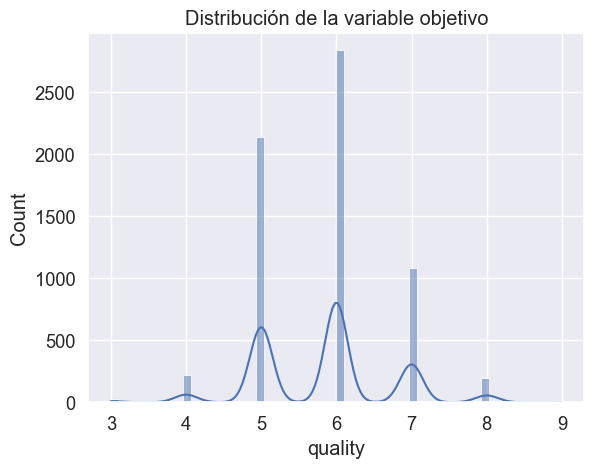

In [19]:
# Visualización de los datos
#ver distribución de la variabe objetivo
sns.histplot(df['quality'], kde=True)
plt.title("Distribución de la variable objetivo")
plt.show()

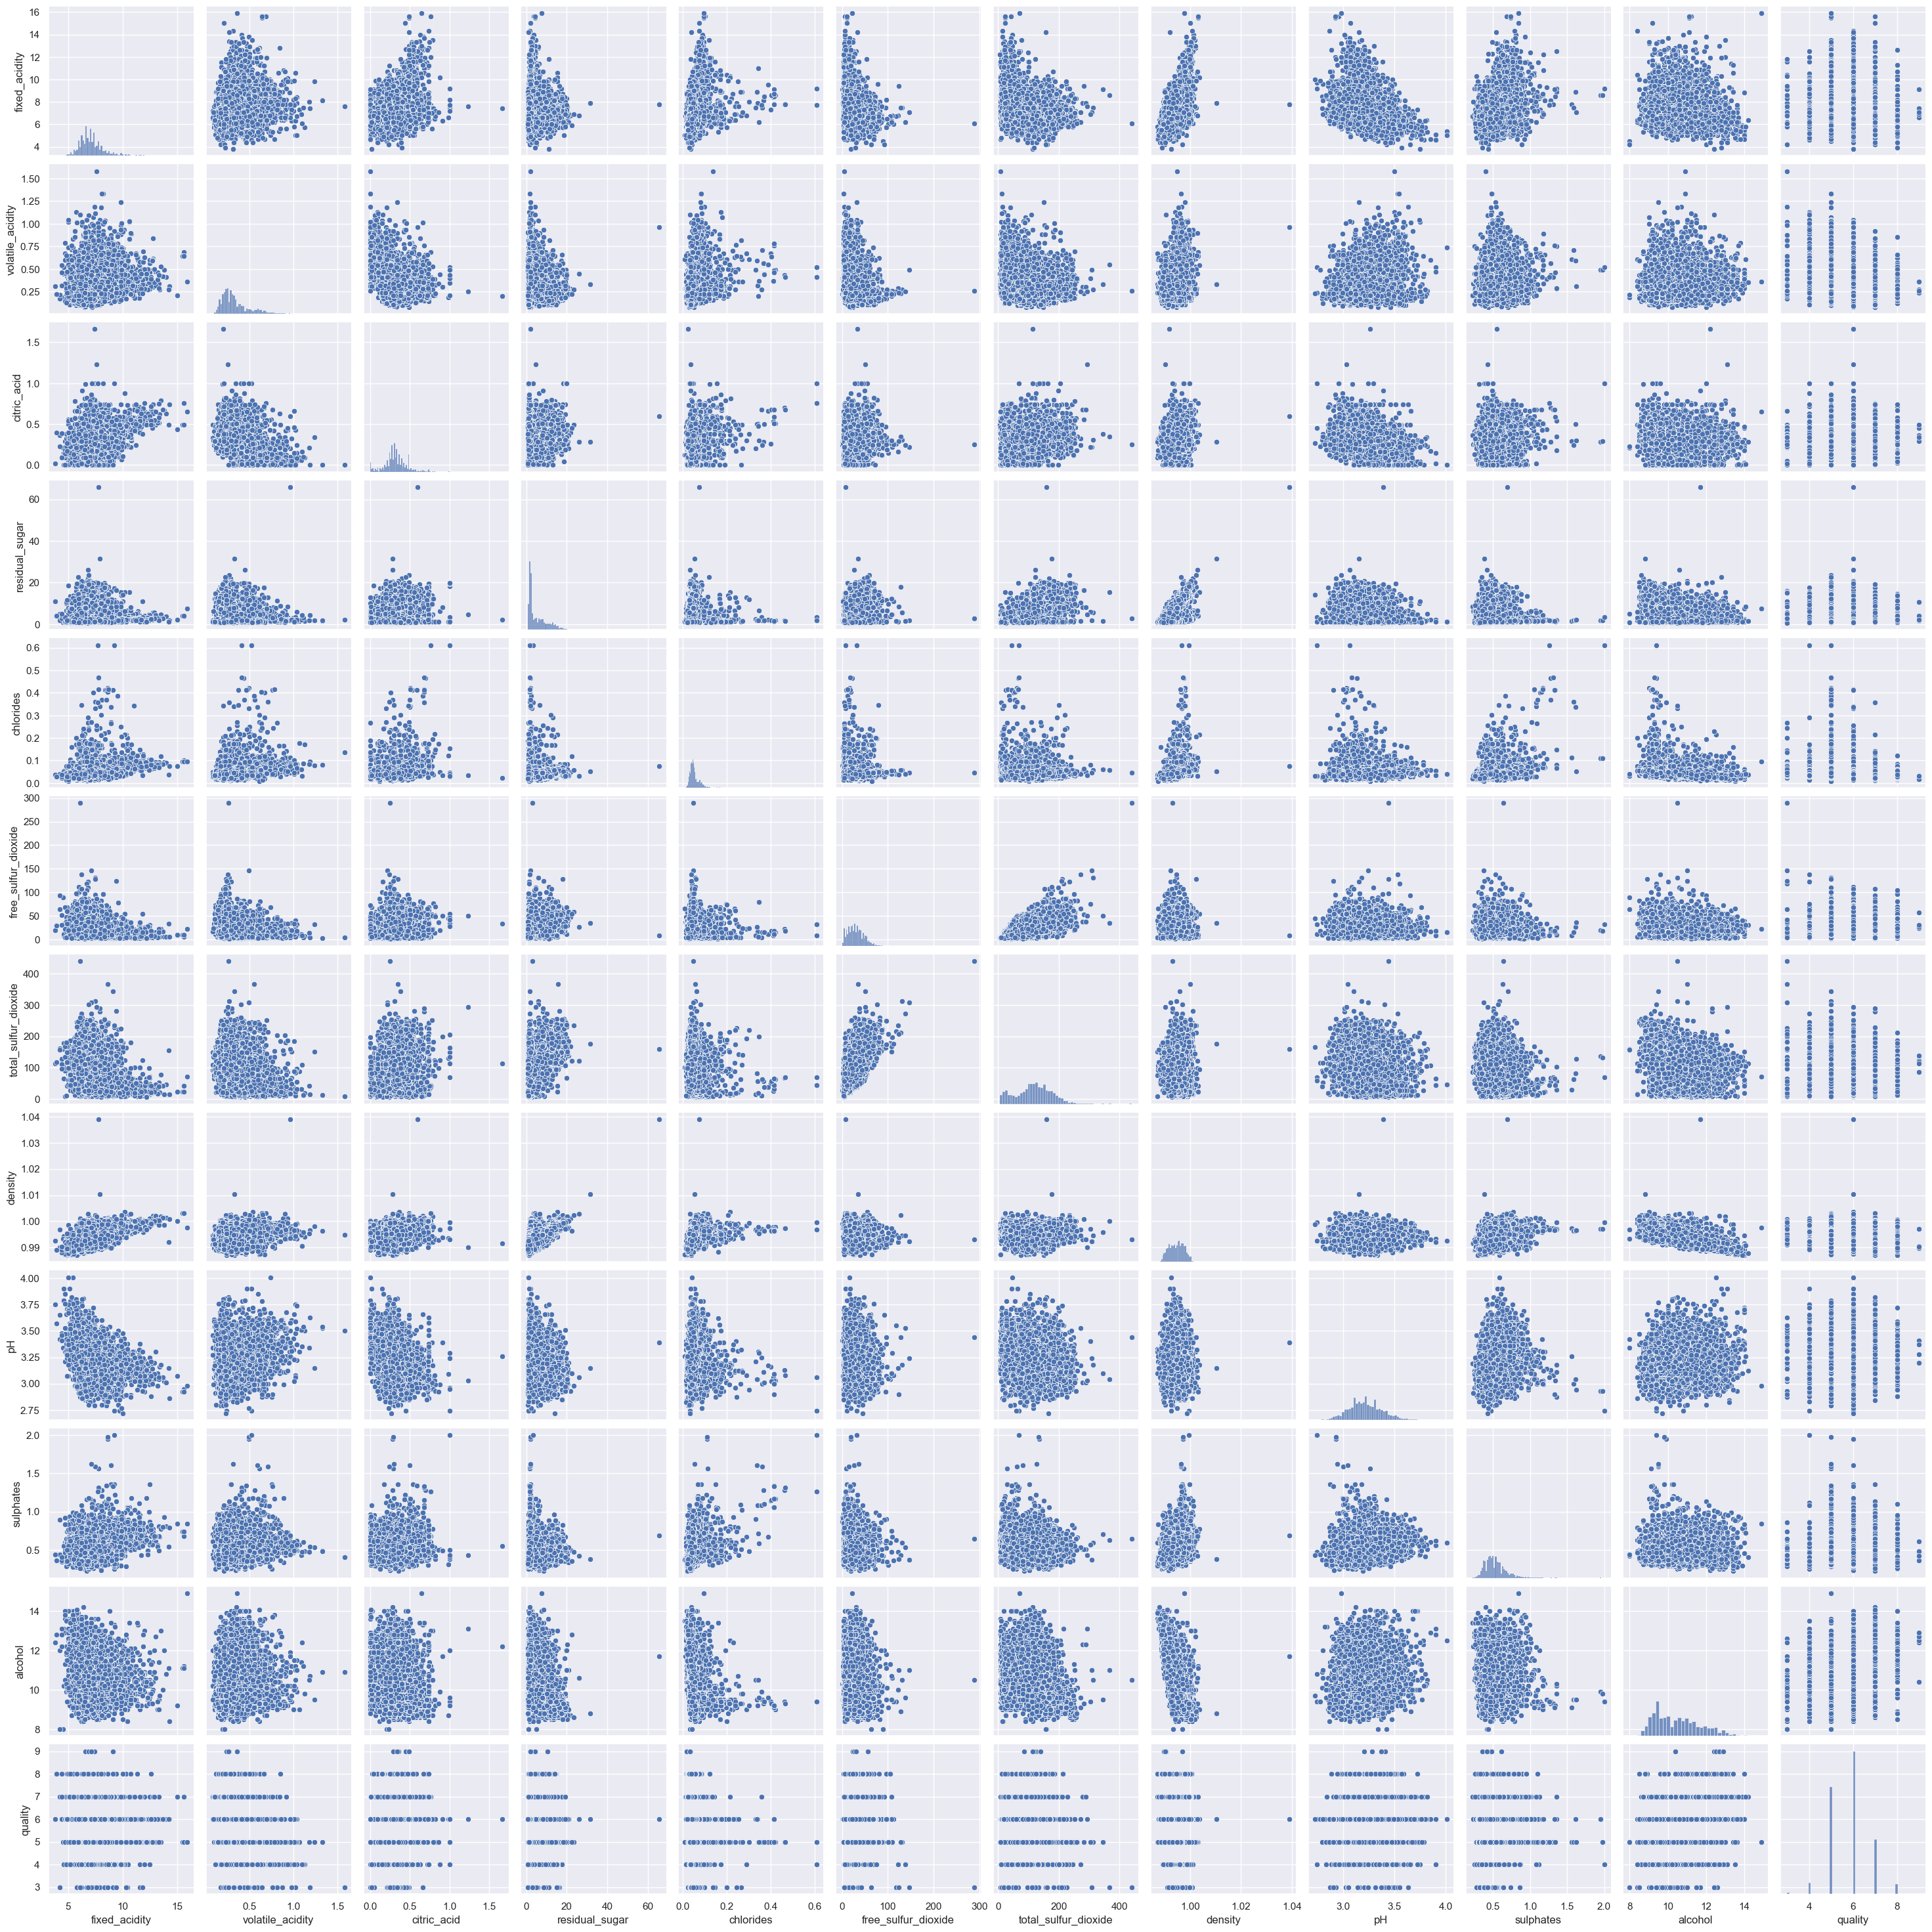

In [8]:
sns.pairplot(df, height=2.5)
plt.show()

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

In [14]:
num_cols = df._get_numeric_data().columns
num_cols 


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

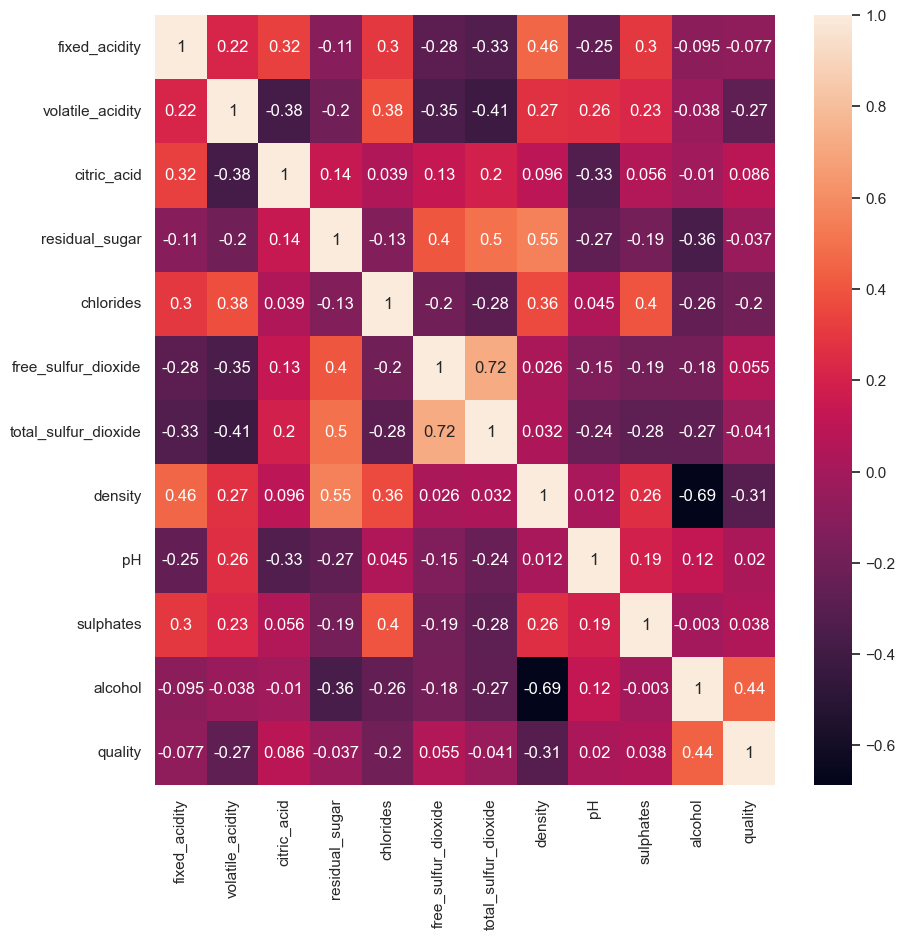

In [25]:
# seleccionar columnas numéricas, para calcular la matriz de correlación
# filtrar columnas numéricas
num_cols = df._get_numeric_data().columns
# calcular la matriz de correlación
cm = np.corrcoef(df[num_cols].values.T)
# graficar la matriz de correlación
plt.figure(figsize=(10,10))
sns.set_theme(font_scale=1)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=num_cols,xticklabels=num_cols)
plt.show()

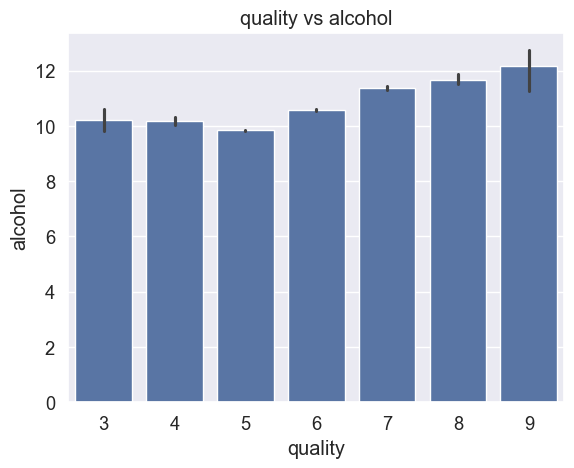

In [24]:
# ver quality vs alcohol
# box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="quality", y="alcohol")
#sns.barplot(data=df, x="quality", y="alcohol")
plt.title("quality vs alcohol")
plt.show()

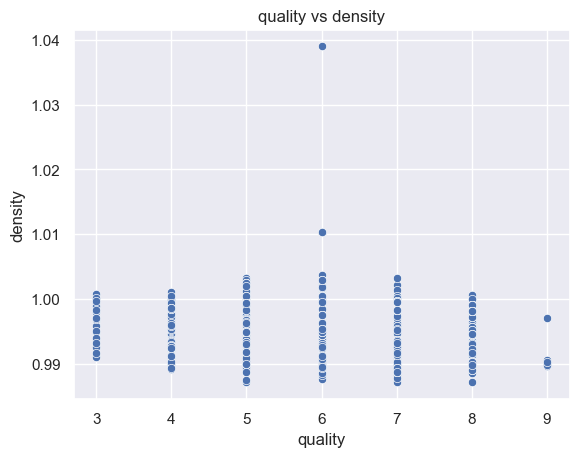

In [27]:
# ver quality vs density
sns.scatterplot(data=df, x="quality", y="density")
plt.title("quality vs density")
plt.show()


## Creando modelo con scikit-learn

In [31]:

#Separar los datos en variables dependientes e independientes
X = df[['alcohol', 'density']].values
#datos de salida, o variable dependiente
y = df['quality'].values.reshape(-1,1)

#transformando datos
estandar_x = StandardScaler()
estandar_y = StandardScaler()

X_std = estandar_x.fit_transform(X)
y_std = estandar_y.fit_transform(y)
# Entrenamiento
regresor = LinearRegression()# definiendo el modelo

regresor.fit(X_std, y_std) #entrenamiento

LinearRegression()

## Análisis de resultados

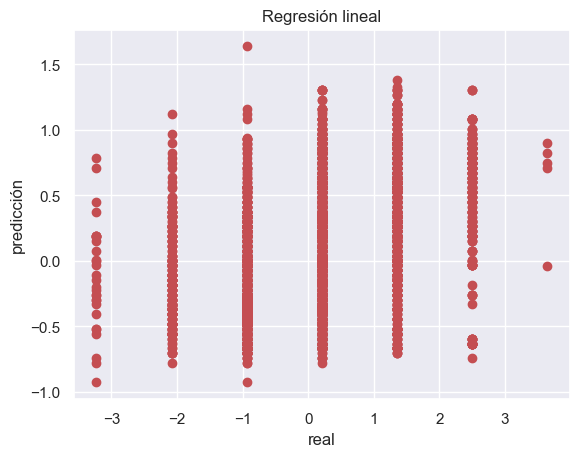

In [34]:
plt.scatter(y_std,regresor.predict(X_std), color='r')
plt.title("Regresión lineal")
plt.ylabel("predicción")
plt.xlabel("real")
plt.show()



In [35]:
# Evaluación
y_pred = regresor.predict(X_std)
print("Error cuadrático medio: %.2f" % mean_squared_error(y_std, y_pred))
print('R2: %.2f' % r2_score(y_std, y_pred))


Error cuadrático medio: 0.80
R2: 0.20


In [36]:
# Evaluación
# Se hace la predicción
y_pred = regresor.predict(X_std)
# Se calcula el error
error = mean_squared_error(y_std, y_pred)
# Se desnormaliza la predicción
y_pred_desnorm = estandar_y.inverse_transform(y_pred)
# Se calcula el error
error_desnorm = mean_squared_error(y, y_pred_desnorm)
print(f'Error normalizado: {error:.2f}')
print(f'Error desnormalizado: {error_desnorm:.2f}')

Error normalizado: 0.80
Error desnormalizado: 0.61


In [40]:
# calculo de la pendiente y la intersección
pendiente = regresor.coef_
interseccion = regresor.intercept_
# pesos de la regresión
features = ['alcohol', 'density']

for i in range(len(features)):
    print(f'{features[i]}: {pendiente[0][i]}')
print(f'Intersección: {interseccion}')

alcohol: 0.44337726924979787
density: -0.0013705963345399372
Intersección: [-6.06403504e-16]


## Generando predicción con el modelo

In [44]:
alcohol = 10
density = 1
#se estandarizan los datos
X_std = estandar_x.transform([[alcohol,density]])
quality = regresor.predict(X_std)
print("La calidad de un vino con 10% de alcohol y densidad 1 es de ",round(estandar_y.inverse_transform(quality)[0][0]))
#se aplica transformada inversa


La calidad de un vino con 10% de alcohol y densidad 1 es de  6


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e4be8b6-6c74-4684-9aa7-992eab9b3282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>